In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t, chi2
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Исппользуемые сокращения:
1. ОКС - общий коэффициент смертности
2. ОПЖ - ожидаемая продолжительность жизни

Показатель | Код показателя
:---------|:------------:
Общий коэффициент смертности | Y1
Ожидаемая продолжительность жизни | Y2
Продажа алкогольных напитков на душу населения | X1
Число правонарушений в области алкогольных напитков | X2
Число заболевших наркоманией | X3
Число преступлений, связанных с наркотиками | X4
Потребление основных продуктов на душу населения | X5
Заболеваемость населения по основным классам болезней (все болезни) | X6
Заболеваемость населения алкоголизмом и алкогольными психозами | X7
Число лиц с социально-значимыми заболеваниями | X8
Заболеваемость при беременности, % | X9
Осложнения родов (на 1000 родов) | X10
Рожденные больными или недоношенные дети, тыс. человек | X11
Площадь жилых помещений, приходящихся на одного жителя | X12
Число семей, нуждающихся в жилых помещениях | X13
Число собственных легковых автомобилей | X14
Перевозки пассажиров автобусами | X15
Перевозки грузов автомобилями | X16
Уровень безработицы | X17
Ранено в ДТП | X18
Удельный вес работников, занятых во вредных или опасных условиях | X19
Зарегистрировано преступлений | X20
Коэффициент Джини | X21
Реальные располагаемые доходы населения | X22
Обеспеченность врачами на 10000 населения | X23
Обеспеченность больничными койками на 10000 населения | X24
Численность лиц, которым оказана мед. помощь | X25
Выбросы загрязняющих атмосферу веществ стационарными источниками | X26
Выбросы загрязняющих атмосферу веществ передвижными источниками | X27
Образование отходов производства и потребления | X28
Сброс загрязненных сточных вод | X29
Выбросы парниковых газов | X30
Доля населения - пользователей Интернета | X31
Доля городского населения | X32
Доля населения с доходами ниже прожиточного минимума | X33
Удельный вес оборудованной жилой площади | X34

**СБОР И ПРЕПРОЦЕССИНГ ДАННЫХ**

Считываем данные из всех таблиц с показателями

In [4]:
# Список Series для последующего объединения в один DataFrame
YX_list = []

#Считывание общего коэффицента смертности из таблицы
Y1_readed_df = pd.read_excel('Data/Y1.xlsx', sheet_name = 'Data', index_col = 0)
Y1_s = Y1_readed_df.loc['Российская Федерация', :'2020']
Y1_s.name = 'Y1'
YX_list.append(Y1_s)

#Считывание ОПЖ из таблицы
Y2_readed_df = pd.read_excel('Data/Y2.xlsx', sheet_name = 'Data', index_col = 0)
Y2_s = Y2_readed_df.loc['Российская Федерация', :'2020']
Y2_s.name = 'Y2'
YX_list.append(Y2_s)

#Считыввание продажи алкогольных напитков из таблицы
X1_readed_df = pd.read_excel('Data/X1.xlsx', sheet_name = 'Data', index_col = 0)
X1_s = X1_readed_df.loc['Российская Федерация', :'2020']
X1_s.name = 'X1'
YX_list.append(X1_s)

#Считыввание правонарушения в области алкогольных напитков из таблицы
X2_readed_df = pd.read_excel('Data/X2.xlsx', sheet_name = 'Data', index_col = 0)
X2_s = X2_readed_df.loc['Российская Федерация', :]
X2_s.name = 'X2'
YX_list.append(X2_s)

#Считыввание заболевших наркоманией из таблицы
X3_readed_df = pd.read_excel('Data/X3.xls', sheet_name = 'Data')
X3_s = X3_readed_df.iloc[0, :]
X3_s.name = 'X3'
YX_list.append(X3_s)

#Считыввание преступлений, связанных с наркотиками из таблицы
X4_readed_df = pd.read_excel('Data/X4.xlsx', sheet_name = 'Data')
X4_s = X4_readed_df.iloc[0, :]
X4_s.name = 'X4'
YX_list.append(X4_s)

#Считыввание потребления основных продуктов питания на душу населения из таблицы
X5_readed_df = pd.read_excel('Data/X5.xlsx', sheet_name = 'Data', index_col = 0)
X5_s = X5_readed_df.loc['Всего']
X5_s.name = 'X5'
YX_list.append(X5_s)

#Считываем заболеваемость населения из таблицы
X6_readed_df = pd.read_excel('Data/X6.xls', sheet_name = 'Data', index_col = 0)
X6_s = X6_readed_df.loc['Все болезни', :]
X6_s = X6_s.astype(int)
X6_s.name = 'X6'
YX_list.append(X6_s)

#Считываем заболеваемость населения алкоголизмом из таблицы
X7_readed_df = pd.read_excel('Data/X7.xls', sheet_name = 'Data')
X7_s = X7_readed_df.iloc[0, :]
X7_s.name = 'X7'
YX_list.append(X7_s)

#Считываем число лиц с социально-значимыми болезнями из таблицы
X8_readed_df = pd.read_excel('Data/X8.xls', sheet_name = 'Data', index_col=0)
X8_s = X8_readed_df.loc['Всего', :]
X8_s.name = 'X8'
YX_list.append(X8_s)

#Считываем заболеваемости при беременности из таблицы
X9_11_readed_df = pd.read_excel('Data/X9-X11.xls', sheet_name = 'Data', index_col=0)
X9_s = X9_11_readed_df.loc['Из числа закончивших беременность страдали болезнями, %:', '2000':]
X10_s = X9_11_readed_df.loc['Число заболеваний, осложнивших роды (на 1000 родов)', '2000':]
X11_s = X9_11_readed_df.loc['Родилось детей больными или недоношенными, тыс. человек', '2000':]
X9_s.name = 'X9'
YX_list.append(X9_s)
X10_s.name = 'X10'
YX_list.append(X10_s)
X11_s.name = 'X11'
YX_list.append(X11_s)

#Считываем площадь жилых помещений, приходящихся на одного жителя из таблицы
X12_readed_df = pd.read_excel('Data/X12.xlsx', sheet_name = 'Data', index_col=0)
X12_s = X12_readed_df.loc['Площадь жилых помещений, приходящаяся на одного жителя', '2000':]
X12_s.name = 'X12'
YX_list.append(X12_s)

#Считываем число семей, нуждающихся в помещениях из таблицы
X13_readed_df = pd.read_excel('Data/X13.xlsx', sheet_name = 'Data', index_col=0)
X13_s = X13_readed_df.loc['Число нуждающихся семей', '2000':]
X13_s.name = 'X13'
YX_list.append(X13_s)

#Считываем число собственных легковых автомобилей из таблицы
X14_readed_df = pd.read_excel('Data/X14.xls', sheet_name = 'Data', index_col=0)
X14_s = X14_readed_df.loc['Российская Федерация', :]
X14_s.name = 'X14'
YX_list.append(X14_s)

#Считываем перевозки пассажиров автобусами из таблицы
X15_readed_df = pd.read_excel('Data/X15.xlsx', sheet_name = 'Data', index_col=0)
X15_s = X15_readed_df.loc['Российская Федерация', :]
X15_s = X15_s.astype(int)
X15_s.name = 'X15'
YX_list.append(X15_s)

#Считываем перевозки грузов автомобилями из таблицы
X16_readed_df = pd.read_excel('Data/X16.xls', sheet_name = 'Data', index_col=0)
X16_s = X16_readed_df.loc['Российская Федерация', :]
X16_s = X16_s.astype(int)
X16_s.name = 'X16'
YX_list.append(X16_s)

#Считываем уровень безработицы из таблицы
X17_readed_df = pd.read_excel('Data/X17.xlsx', sheet_name = 'Data', index_col=0)
X17_s = X17_readed_df.loc['Российская Федерация', :]
X17_s.name = 'X17'
YX_list.append(X17_s)

#Считываем число раненых в ДТП из таблицы
X18_readed_df = pd.read_excel('Data/X18.xlsx', sheet_name = 'Data', index_col=0)
X18_s = X18_readed_df.loc['Российская Федерация', :]
X18_s.name = 'X18'
YX_list.append(X18_s)

#Считываем удельный вес работников, занятых во вредных или опасных условиях из таблицы
X19_readed_df = pd.read_excel('Data/X19.xlsx', sheet_name = 'Data')
X19_s = X19_readed_df.iloc[0, :-1]
X19_s.name = 'X19'
YX_list.append(X19_s)

#Считываем число зарегистрированных преступлений из таблицы
X20_readed_df = pd.read_excel('Data/X20.xlsx', sheet_name = 'Data', index_col=0)
X20_s = X20_readed_df.loc['Российская Федерация', :]
X20_s.name = 'X20'
YX_list.append(X20_s)

#Считываем коээфициент Джини из таблицы
X21_readed_df = pd.read_excel('Data/X21.xlsx', sheet_name = 'Data', index_col=0)
X21_s = X21_readed_df.loc['Российская Федерация', :]
X21_s.name = 'X21'
YX_list.append(X21_s)

#Считываем реальные располагаемые доходы населения из таблицы
X22_readed_df = pd.read_excel('Data/X22.xlsx', sheet_name = 'Data', index_col=0)
X22_s = X22_readed_df.loc['Российская Федерация', :]
X22_s.name = 'X22'
YX_list.append(X22_s)

#Считываем обеспеченность врачами из таблицы
X23_readed_df = pd.read_excel('Data/X23.xlsx', sheet_name = 'Data', index_col=0)
X23_s = X23_readed_df.loc['Всего по РФ', :]
X23_s.name = 'X23'
YX_list.append(X23_s)

#Считываем обеспеченность больничными койками из таблицы
X24_readed_df = pd.read_excel('Data/X24.xlsx', sheet_name = 'Data', index_col=0)
X24_s = X24_readed_df.loc['Всего по РФ', :]
X24_s.name = 'X24'
YX_list.append(X24_s)

#Считываем численность лиц, которым оказана мед. помощь из таблицы
X25_readed_df = pd.read_excel('Data/X25.xlsx', sheet_name = 'Data', index_col=0)
X25_s = X25_readed_df.loc['Российская Федерация', :]
X25_s.name = 'X25'
YX_list.append(X25_s)

#Считываем выбросы загрязняющих атмофсеру веществ стационарными и передвижными источниками из таблицы
X26_27_readed_df = pd.read_excel('Data/X26-X27.xls', sheet_name = 'Data', index_col=0)
X26_s = X26_27_readed_df.loc['стационарными источниками', :]
X27_s = X26_27_readed_df.loc['передвижными источниками', :]
X26_s.name = 'X26'
YX_list.append(X26_s)
X27_s.name = 'X27'
YX_list.append(X27_s)

#Считываем образование отходов производства и потребления из таблицы
X28_readed_df = pd.read_excel('Data/X28.xls', sheet_name = 'Data', index_col=0)
X28_s = X28_readed_df.iloc[1:, 0]
X28_s.index = X28_s.index.astype(int)
X28_s.name = 'X28'
YX_list.append(X28_s)

#Считываем выбросы загрязненных сточных вод из таблицы
X29_readed_df = pd.read_excel('Data/X29.xls', sheet_name = 'Data', index_col=0)
X29_s = X29_readed_df.iloc[8:, 0]
X29_s.index = X29_s.index.astype(int)
X29_s.name = 'X29'
YX_list.append(X29_s)

#Считываем выбросы парниковых газов из таблицы
X30_readed_df = pd.read_excel('Data/X30.xlsx', sheet_name = 'Data', index_col=0)
X30_s = X30_readed_df.loc['Всего', :]
X30_s.name = 'X30'
YX_list.append(X30_s)

#Считываем долю пользователей Интернета среди населения из таблицы
X31_readed_df = pd.read_excel('Data/X31.xlsx', sheet_name = 'Data', index_col=0)
X31_s = X31_readed_df.loc['Российская Федерация', :'2020']
X31_s.name = 'X31'
YX_list.append(X31_s)

#Считываем долю гордского населения из таблицы
X32_readed_df = pd.read_excel('Data/X32.xlsx', sheet_name = 'Data', index_col=0)
X32_s = X32_readed_df.loc['Российская Федерация', :'2020']
X32_s.name = 'X32'
YX_list.append(X32_s)

#Считываем долю населения с доходами меньше прожиточного миинимума из таблицы
X33_readed_df = pd.read_excel('Data/X33.xlsx', sheet_name = 'Data', index_col=0)
X33_s = X33_readed_df.loc['Российская Федерация', :]
X33_s.name = 'X33'
YX_list.append(X33_s)

#Считываем удельный вес оборудованной жилплощади
X34_readed_df = pd.read_excel('Data/X34.xlsx', sheet_name = 'Data', index_col=0)
X34_s = X34_readed_df.loc['Всего', :]
X34_s.name = 'X34'
YX_list.append(X34_s)

Объединим все собранные Series в единый DataFrame

In [5]:
df_with_gaps = pd.concat(YX_list, axis = 1)
# df_with_gaps.index = df_with_gaps.index.astype(str)
df_with_gaps

,Y1,Y2,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34
2000,15.290000,65.30,8.01,203173.00,NaN,243.6,682.9,730,NaN,1581.5,97.6,825.4,548.2,19.2,11,130.500000,23001095,5878,10.600000,122.40,NaN,NaN,0.39,112.0,63.40,220.09,52.300000,18820,13481,NaN,20.30000,NaN,NaN,73.13,29.0,60.728571
2001,15.550000,65.20,8.24,152779.98,NaN,241.6,699.4,719,NaN,NaN,95.6,834.6,585.7,NaN,10,137.200000,22462213,6125,9.000000,128.60,NaN,NaN,0.39,108.7,64.00,220.30,52.300000,19124,14168,NaN,19.80000,NaN,NaN,73.18,27.5,61.441429
2002,16.170000,65.00,8.61,109496.98,NaN,189.6,715.5,740,NaN,NaN,97.6,827.5,630.3,NaN,9,145.800000,21920589,6347,7.900000,148.40,NaN,NaN,0.39,111.1,65.90,216.90,52.500000,19481,14449,NaN,19.80000,NaN,NaN,73.28,24.6,61.614286
2003,16.350000,64.90,9.10,246508.98,228.0,181.7,730.0,748,1545.3,NaN,101.1,817.5,657.1,NaN,11,153.000000,20912284,6468,8.190000,168.60,NaN,NaN,0.40,114.9,125.29,325.40,52.900000,19829,14823,2613.5,19.00000,NaN,NaN,73.34,20.3,61.885714
2004,15.930000,65.30,9.20,246395.97,228.3,150.1,738.6,743,1544.2,NaN,97.8,805.0,669.3,NaN,10,158.900000,21018279,6567,7.800000,174.50,19.900000,NaN,0.40,109.9,115.69,326.40,51.600000,20491,15260,2644.3,18.50000,NaN,NaN,73.50,17.6,62.214286
2005,16.050000,65.40,9.30,220290.00,230.8,175.2,753.1,743,1541.8,1571.3,99.0,799.3,652.6,20.8,7,168.400000,16373982,6684,7.100000,191.50,20.516667,NaN,0.40,112.4,115.60,317.80,51.500000,20425,15410,3035.5,17.70000,1965.4,NaN,73.09,17.8,63.238571
2006,15.140000,66.70,9.40,196590.98,233.3,212.0,769.5,760,1506.3,1725.1,98.9,793.5,658.0,21.0,6,177.000000,14733625,6753,7.100000,199.50,21.500000,NaN,0.41,113.5,118.59,314.70,51.600000,20568,14942,3519.4,17.50000,NaN,NaN,73.20,15.2,63.555714
2007,14.560000,67.59,9.70,176151.99,237.3,231.2,784.7,767,1482.2,1711.3,93.3,759.6,698.8,21.4,6,194.400000,14794891,6861,6.000000,204.60,23.216667,NaN,0.42,112.1,119.08,309.10,51.900000,20637,14895,3899.3,17.20000,NaN,NaN,73.30,13.3,63.824286
2008,14.540000,68.00,9.60,164941.99,239.5,232.6,801.7,767,1459.1,1677.8,90.6,721.3,716.5,21.8,6,212.300000,14717826,6893,6.200000,189.80,24.233333,NaN,0.42,102.4,117.80,293.40,51.100000,20103,13849,3876.9,17.10000,NaN,NaN,73.50,13.4,64.242857
2009,14.080000,68.80,9.10,110875.99,238.2,238.5,804.0,797,1411.8,1611.2,87.3,739.4,715.9,22.2,5,219.400000,13704444,5240,8.300000,178.90,25.450000,NaN,0.42,103.0,118.00,290.89,51.200000,19021,13733,3505.0,15.90000,NaN,NaN,73.50,13.0,64.570000


In [239]:
# Записываем полученный датафрейм в Excel-файл
df_with_gaps.to_excel('Data/df_with_gaps.xlsx')

1. Посмотрим процент пропусков данных по факторам
2. Отбросим все факторы, которые имеют >19% пропусков данных

In [6]:
def style_gap_proc(value, props = ''):
    big_gaps_proc = 20
    big_props = 'color:white;background-color:red'
    small_props = 'color:white;background-color:lightsalmon'
    zero_props = 'color:white;background-color:darkblue'
    if value >= big_gaps_proc-1e-3:
        return big_props
    elif value == 0.0:
        return zero_props
    else:
        return small_props

df_with_gaps_gpr = (df_with_gaps.isna().mean()*100).to_frame().transpose()
df_with_gaps_gpr.index=['Gaps, %']
df_with_gaps_gpr = df_with_gaps_gpr.style.applymap(style_gap_proc)
df_with_gaps_gpr#.to_excel('Data/gaps_proc.xlsx')

,Y1,Y2,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34
"Gaps, %",0.000000,0.000000,9.523810,0.000000,14.285714,4.761905,0.000000,0.000000,14.285714,19.047619,0.000000,0.000000,0.000000,19.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.047619,47.619048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.285714,0.000000,47.619048,61.904762,0.000000,0.000000,9.523810


Отбрасываем факторы X20, X30, X31 из-за чрезмерного кол-ва пропусков данных

In [7]:
df_with_gaps_droped = df_with_gaps.drop(['X20', 'X30', 'X31'], axis=1)
df_with_gaps_droped

,Y1,Y2,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X21,X22,X23,X24,X25,X26,X27,X28,X29,X32,X33,X34
2000,15.290000,65.30,8.01,203173.00,NaN,243.6,682.9,730,NaN,1581.5,97.6,825.4,548.2,19.2,11,130.500000,23001095,5878,10.600000,122.40,NaN,0.39,112.0,63.40,220.09,52.300000,18820,13481,NaN,20.30000,73.13,29.0,60.728571
2001,15.550000,65.20,8.24,152779.98,NaN,241.6,699.4,719,NaN,NaN,95.6,834.6,585.7,NaN,10,137.200000,22462213,6125,9.000000,128.60,NaN,0.39,108.7,64.00,220.30,52.300000,19124,14168,NaN,19.80000,73.18,27.5,61.441429
2002,16.170000,65.00,8.61,109496.98,NaN,189.6,715.5,740,NaN,NaN,97.6,827.5,630.3,NaN,9,145.800000,21920589,6347,7.900000,148.40,NaN,0.39,111.1,65.90,216.90,52.500000,19481,14449,NaN,19.80000,73.28,24.6,61.614286
2003,16.350000,64.90,9.10,246508.98,228.0,181.7,730.0,748,1545.3,NaN,101.1,817.5,657.1,NaN,11,153.000000,20912284,6468,8.190000,168.60,NaN,0.40,114.9,125.29,325.40,52.900000,19829,14823,2613.5,19.00000,73.34,20.3,61.885714
2004,15.930000,65.30,9.20,246395.97,228.3,150.1,738.6,743,1544.2,NaN,97.8,805.0,669.3,NaN,10,158.900000,21018279,6567,7.800000,174.50,19.900000,0.40,109.9,115.69,326.40,51.600000,20491,15260,2644.3,18.50000,73.50,17.6,62.214286
2005,16.050000,65.40,9.30,220290.00,230.8,175.2,753.1,743,1541.8,1571.3,99.0,799.3,652.6,20.8,7,168.400000,16373982,6684,7.100000,191.50,20.516667,0.40,112.4,115.60,317.80,51.500000,20425,15410,3035.5,17.70000,73.09,17.8,63.238571
2006,15.140000,66.70,9.40,196590.98,233.3,212.0,769.5,760,1506.3,1725.1,98.9,793.5,658.0,21.0,6,177.000000,14733625,6753,7.100000,199.50,21.500000,0.41,113.5,118.59,314.70,51.600000,20568,14942,3519.4,17.50000,73.20,15.2,63.555714
2007,14.560000,67.59,9.70,176151.99,237.3,231.2,784.7,767,1482.2,1711.3,93.3,759.6,698.8,21.4,6,194.400000,14794891,6861,6.000000,204.60,23.216667,0.42,112.1,119.08,309.10,51.900000,20637,14895,3899.3,17.20000,73.30,13.3,63.824286
2008,14.540000,68.00,9.60,164941.99,239.5,232.6,801.7,767,1459.1,1677.8,90.6,721.3,716.5,21.8,6,212.300000,14717826,6893,6.200000,189.80,24.233333,0.42,102.4,117.80,293.40,51.100000,20103,13849,3876.9,17.10000,73.50,13.4,64.242857
2009,14.080000,68.80,9.10,110875.99,238.2,238.5,804.0,797,1411.8,1611.2,87.3,739.4,715.9,22.2,5,219.400000,13704444,5240,8.300000,178.90,25.450000,0.42,103.0,118.00,290.89,51.200000,19021,13733,3505.0,15.90000,73.50,13.0,64.570000


Проинтерполируем недостающие данные для факторов: X1, X3, X4, X7, X8, X12, X19, X28, X34

In [8]:
# Посмотрим с какими факторами без пропусков сильнее всего коррелируют факторы с пропусками
def sign_fmt_func(corr_coef, props=''):
    return 'background-color:red;' if corr_coef is np.nan else props

def corr_sign_m(df, alpha=0.05):
    corr_m = df.corr()
    corr_sign_m = pd.DataFrame().reindex_like(corr_m)
    for i in corr_m.index:
        for j in corr_m.columns:
            n1 = df.loc[:, i].count()
            n2 = df.loc[:, j].count()
            n = np.min([n1, n2])
            r = corr_m.loc[i, j]
            if abs(r) < 1:
                t_ob = r/np.sqrt(1-r**2) * np.sqrt(n-2)
                t_cr = t.ppf(1-alpha/2, n-2)
                sign = abs(t_ob) > t_cr-1e-6
            else:
                sign = True
            corr_sign_m.loc[i, j] = sign
    res = corr_m[corr_sign_m].drop(['X1', 'X3', 'X4', 'X7', 'X8', 'X12', 'X19', 'X28', 'X34'])
    res = res.loc[:, ['X1', 'X3', 'X4', 'X7', 'X8', 'X12', 'X19', 'X28', 'X34']]
    res = res.style.background_gradient(axis=None, cmap='RdYlGn').applymap(sign_fmt_func)
    return res

df_to_X_corr = df_with_gaps_droped.loc[:, 'X1':]
X_corr_sign_m =  corr_sign_m(df_to_X_corr)
X_corr_sign_m

,X1,X3,X4,X7,X8,X12,X19,X28,X34
X2,0.476951,0.501263,nan,0.702774,nan,-0.765230,-0.770005,-0.718907,-0.521741
X5,nan,nan,nan,nan,nan,nan,nan,nan,nan
X6,nan,nan,nan,nan,nan,nan,0.504858,nan,0.627630
X9,0.729090,0.745306,nan,0.858285,nan,-0.844283,-0.934215,-0.800154,-0.491518
X10,0.655188,0.729405,nan,0.824732,nan,-0.810403,-0.888094,-0.756247,-0.455687
X11,0.465151,0.725565,nan,0.568169,-0.485966,nan,nan,-0.555321,nan
X13,nan,0.536223,nan,0.704182,nan,-0.822089,-0.753739,-0.754889,-0.706120
X14,-0.663349,-0.840808,nan,-0.953157,nan,0.977063,0.964032,0.936230,0.648273
X15,nan,0.679612,nan,0.827854,nan,-0.905573,-0.847575,-0.844787,-0.684722
X16,0.619358,0.527736,nan,0.669462,nan,-0.581562,-0.760009,-0.562269,nan


На основе анализа матрицы корреляций можем составить следующую таблицу парной регрессии (факторов, имеющих пропуски в качестке Y и факторов, не имеющих пропуски в качестве X):

| X | Y |
|:-:|:-:|
| X1 | X26 |
| X3 | X25 |
| X4 | - |
| X7 | X29 |
| X8 | X24 |
| X12 | X29 |
| X19 | X14 |
| X28 | X29 |
| X34 | X29 |

In [9]:
df_interpolated = df_with_gaps_droped.copy()

In [10]:
df_interpolated = df_with_gaps_droped.copy()
df_interpolated.loc[:, 'X1'] = df_interpolated.loc[:, 'X1'].interpolate()
df_interpolated.loc[:, 'X3'] = df_interpolated.loc[:, 'X3'].sort_index(ascending=False).interpolate()
df_interpolated.loc[:, 'X4'] = df_interpolated.loc[:, 'X4'].interpolate(method='spline', order=2)
df_interpolated.loc[:, 'X7'] = df_interpolated.loc[:, 'X7'].sort_index(ascending=False).interpolate()
df_interpolated.loc[:, 'X8'] = df_interpolated.loc[:, 'X8'].interpolate(method='spline', order=2)
df_interpolated.loc[:, 'X12'] = df_interpolated.loc[:, 'X12'].interpolate()
df_interpolated.loc[:, 'X19'] = df_interpolated.loc[:, 'X19'].sort_index(ascending=False).interpolate()
df_interpolated.loc[:, 'X28'] = df_interpolated.loc[:, 'X28'].sort_index(ascending=False).interpolate()
df_interpolated.loc[:, 'X34'] = df_interpolated.loc[:, 'X34'].interpolate(method='spline', order=1)


Оценим с помощью графиков насколько попадающими в тенденцию динамического ряда оказались оценки пропущенных значений

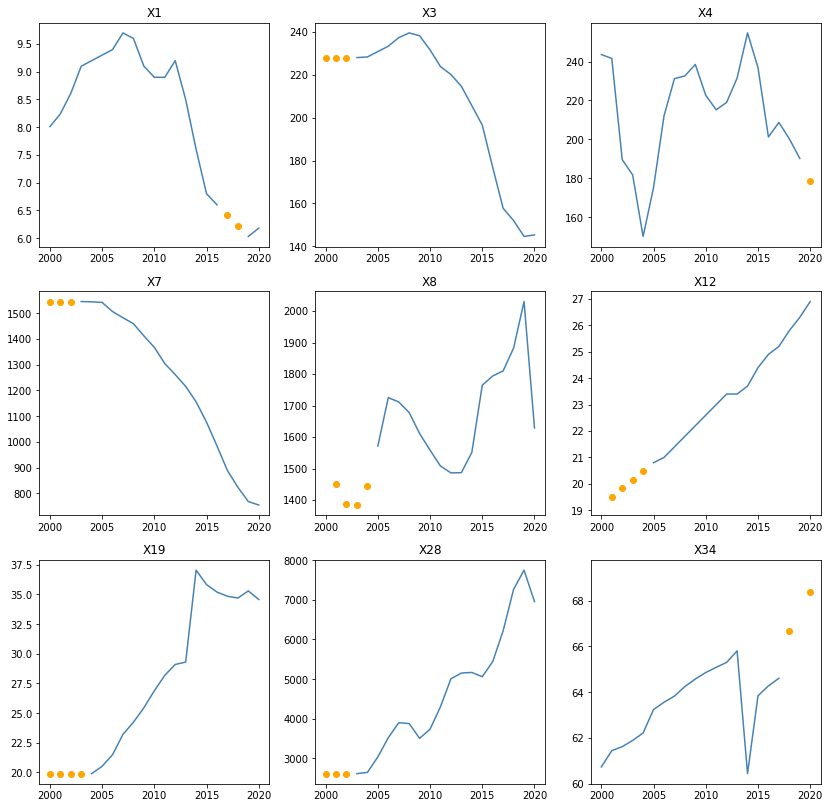

In [11]:
# Графическая оценка интерполяции данных
df_to_plot = df_with_gaps_droped
df_to_plot_int = df_interpolated[df_with_gaps_droped.ne(df_interpolated)]
factors_to_plot_list = ['X1', 'X3', 'X4', 'X7', 'X8', 'X12', 'X19', 'X28', 'X34']

fig, axes = plt.subplots(3, 3, figsize=(14, 14))

for i, v in enumerate(factors_to_plot_list):
    axes[i//3, i%3].plot(df_to_plot.index, df_to_plot.loc[:, v], color='steelblue')
    axes[i//3, i%3].set_title(v)
    axes[i//3, i%3].scatter(df_to_plot_int.index, df_to_plot_int.loc[:, v], color='orange')

Перепроверим, что не осталось пропусков данных

In [12]:
def style_gap_proc(value, props = ''):
    big_gaps_proc = 20
    big_props = 'color:white;background-color:red'
    small_props = 'color:white;background-color:lightsalmon'
    zero_props = 'color:white;background-color:darkblue'
    if value >= big_gaps_proc-1e-3:
        return big_props
    elif value == 0.0:
        return zero_props
    else:
        return small_props

df_interpolated_gpr = (df_interpolated.isna().mean()*100).to_frame().transpose()
df_interpolated_gpr.index=['Gaps, %']
df_interpolated_gpr = df_interpolated_gpr.style.applymap(style_gap_proc)
df_interpolated_gpr

,Y1,Y2,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X21,X22,X23,X24,X25,X26,X27,X28,X29,X32,X33,X34
"Gaps, %",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
df_interpolated.to_excel('Data/df_no_gaps.xlsx')

**ОТБОР ФАКТОРОВ**

Для начала удалим все факторы, которые не коррелируют (имеют статистически незначимый коэффициент корреляции) ни с ОКС, ни с ОПЖ

In [13]:
def corr_sign_m(df, alpha=0.05):
    corr_m = df.corr()
    corr_sign_m = pd.DataFrame().reindex_like(corr_m)
    for i in corr_m.index:
        for j in corr_m.columns:
            n1 = df.loc[:, i].count()
            n2 = df.loc[:, j].count()
            n = np.min([n1, n2])
            r = corr_m.loc[i, j]
            if abs(r) < 1:
                t_ob = r/np.sqrt(1-r**2) * np.sqrt(n-2)
                t_cr = t.ppf(1-alpha/2, n-2)
                sign = abs(t_ob) > t_cr-1e-6
            else:
                sign = True
            corr_sign_m.loc[i, j] = sign
    res = corr_m[corr_sign_m]
    return res

corr_Y_m = corr_sign_m(df_interpolated).loc['Y1':'Y2', :]
df_significant_X = df_interpolated.loc[:, ~corr_Y_m.isna().all()]
df_significant_X.columns
# corr_Y_m.to_excel('Data/corr_m.xlsx')
corr_Y_m

,Y1,Y2,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X21,X22,X23,X24,X25,X26,X27,X28,X29,X32,X33,X34
Y1,1.000000,-0.980166,0.668224,0.798870,0.701169,NaN,-0.618955,-0.794006,0.863928,-0.659164,0.924587,0.887302,NaN,-0.892245,0.854650,-0.939168,0.860228,0.709807,0.788318,NaN,-0.929558,-0.539769,0.861094,NaN,NaN,0.871692,0.769093,NaN,-0.887516,0.879800,-0.857694,0.724457,-0.642105
Y2,-0.980166,1.000000,-0.729428,-0.789196,-0.789890,NaN,0.566354,0.767026,-0.931638,0.684758,-0.937315,-0.911819,NaN,0.960762,-0.879336,0.984251,-0.905643,-0.701191,-0.839675,NaN,0.961289,0.509327,-0.878818,NaN,NaN,-0.927967,-0.805524,-0.448939,0.942533,-0.946964,0.922476,-0.757492,0.712345


Были удалены факторы: X4, X11, X18, X23, X24
Проверим, что у них нет нелинейной связи с ОКС и ОПЖ

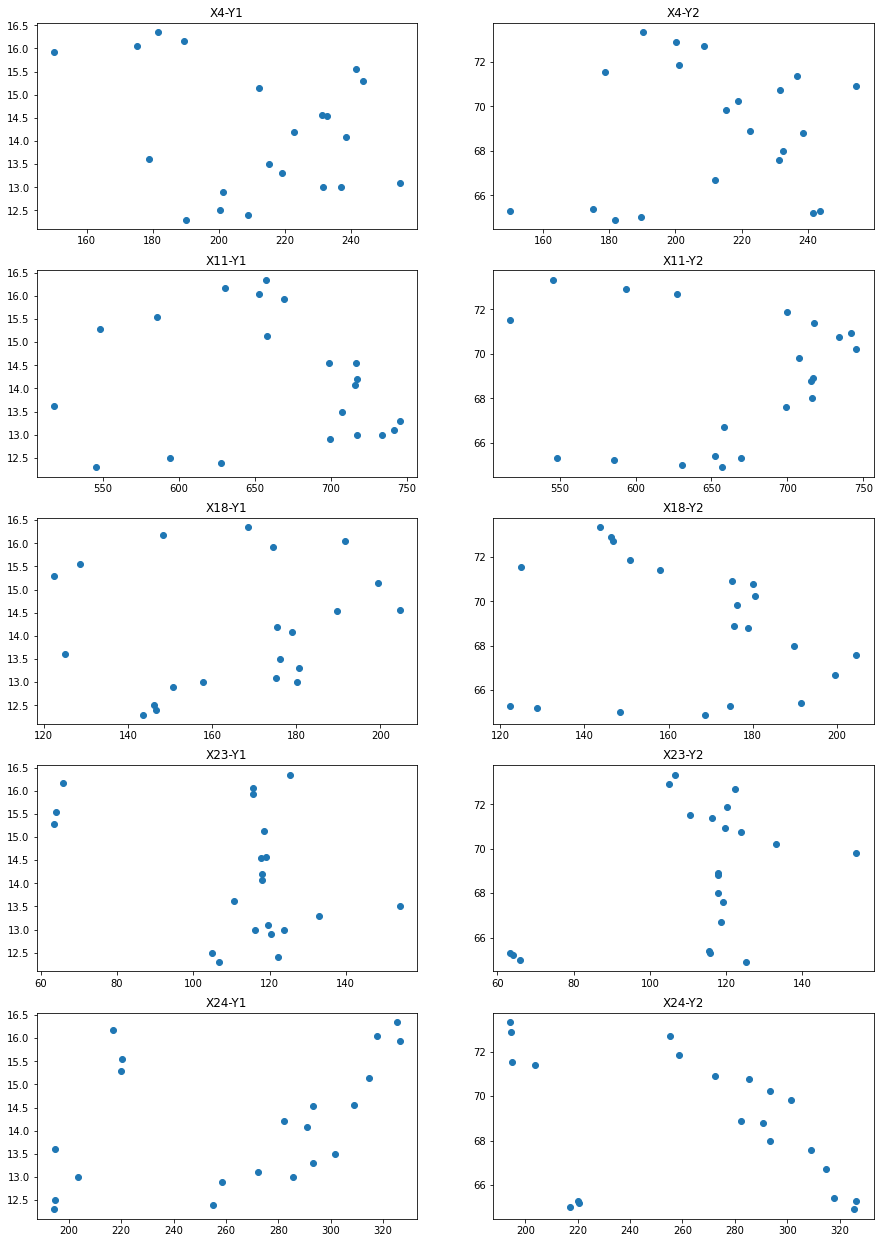

In [14]:
# Графическая оценка интерполяции данных
df_to_plot = df_interpolated
factors_to_plot_list_X = ['X4', 'X11', 'X18', 'X23', 'X24']
factors_to_plot_list_Y = ['Y1', 'Y2']

fig, axes = plt.subplots(5, 2, figsize=(15, 22))

for i, x in enumerate(factors_to_plot_list_X):
    for j, y in enumerate(factors_to_plot_list_Y): 
        axes[i, j].scatter(df_to_plot.loc[:, x], df_to_plot.loc[:, y])
        axes[i, j].set_title(x+'-'+y)

Анализ графиков показал, что нелинейных зависимостей между факторами X4, X11, X18, X23, X24 с ОКС и ОПЖ нет

In [508]:
df_significant_X.to_excel('Data/df_significant.xlsx')

Произведем тест на мультколлинеарность

In [15]:
alpha = 0.05
R = df_significant_X.loc[:, 'X1':].corr()
det_R = np.linalg.det(R)
n = len(df_significant_X.index) #21
k = len(R.index) #26
FG = -(n-1-1/6*(2*k+5))*np.log(det_R)
FG_cr = chi2.ppf(1-alpha, 1/2*k*(k-1))
FG, FG_cr, FG>FG_cr

(2807.625522328188, 368.0415819552954, True)

Так как FG>FG_табл, то в массиве факторов наблюдается мультиколлинеарность

In [16]:
# Нормализация данных
df_norm = df_significant_X.apply(lambda S: (S-S.mean())/S.std(), axis=0)
df_norm

,Y1,Y2,X1,X2,X3,X5,X6,X7,X8,X9,X10,X12,X13,X14,X15,X16,X17,X19,X21,X22,X25,X26,X27,X28,X29,X32,X33,X34
2000,0.835768,-1.219440,-0.126572,1.178169,0.579055,-1.839856,-1.628597,0.958752,-0.234052,1.018182,1.135287,-1.495847,1.972127,-1.510586,1.837197,-0.082888,2.542492,-1.150454,-1.770355,1.150650,1.000386,-0.019391,0.040612,-1.119296,1.656670,-1.218445,2.492873,-1.458743
2001,1.028995,-1.253453,0.053765,0.375073,0.579055,-1.526414,-2.098267,0.958752,-0.997486,0.847877,1.215873,-1.357769,1.553797,-1.408113,1.717359,0.344064,1.512425,-1.150454,-1.770355,0.605232,1.000386,0.217302,0.289831,-1.119296,1.452418,-1.118960,2.215201,-1.149242
2002,1.489766,-1.321479,0.343872,-0.314713,0.579055,-1.220570,-1.201624,0.958752,-1.384948,1.018182,1.153682,-1.219691,1.135467,-1.276579,1.596911,0.727802,0.804254,-1.150454,-1.770355,1.001900,1.074946,0.495260,0.391767,-1.119296,1.452418,-0.919992,1.678370,-1.074192
2003,1.623538,-1.355491,0.728068,1.868800,0.579055,-0.945121,-0.860046,0.958752,-1.396498,1.316216,1.066089,-1.081613,1.972127,-1.166458,1.372680,0.936957,0.990954,-1.150454,-0.765559,1.629956,1.224066,0.766210,0.527441,-1.119296,1.125614,-0.800611,0.882378,-0.956346
2004,1.311403,-1.219440,0.806475,1.866999,0.588175,-0.781751,-1.073532,0.954885,-1.032138,1.035213,0.956598,-0.943534,1.553797,-1.076220,1.396252,1.108084,0.739875,-1.150454,-0.765559,0.803566,0.739426,1.281639,0.685968,-1.100300,0.921362,-0.482262,0.382570,-0.813690
2005,1.400584,-1.185427,0.884883,1.450957,0.664176,-0.506302,-1.073532,0.946448,-0.294112,1.137396,0.906670,-0.805456,0.298807,-0.930922,0.363438,1.310324,0.289221,-1.055855,-0.765559,1.216761,0.702146,1.230252,0.740383,-0.859036,0.594559,-1.298032,0.419592,-0.368977
2006,0.724292,-0.743261,0.963290,1.073274,0.740177,-0.194759,-0.347678,0.821644,0.611498,1.128881,0.855866,-0.719157,-0.119523,-0.799388,-0.001350,1.429594,0.289221,-0.905008,0.239237,1.398567,0.739426,1.341591,0.570610,-0.560601,0.512858,-1.079167,-0.061705,-0.231283
2007,0.293248,-0.440547,1.198512,0.747545,0.861779,0.093987,-0.048797,0.736918,0.530241,0.652026,0.558926,-0.546560,-0.119523,-0.533263,0.012275,1.616278,-0.418950,-0.641665,1.244033,1.167178,0.851266,1.395314,0.553560,-0.326305,0.390307,-0.880198,-0.413422,-0.114677
2008,0.278384,-0.301094,1.120104,0.568895,0.928660,0.416928,-0.048797,0.655708,0.332985,0.422114,0.223445,-0.373962,-0.119523,-0.259490,-0.004863,1.671592,-0.290192,-0.485704,1.244033,-0.436019,0.553026,0.979545,0.174109,-0.340120,0.349457,-0.482262,-0.394911,0.067054
2009,-0.063478,-0.028992,0.728068,-0.292737,0.889139,0.460620,1.232122,0.489421,-0.059171,0.141110,0.381988,-0.201364,-0.537853,-0.150898,-0.230222,-1.185704,1.061771,-0.299063,1.244033,-0.336852,0.590306,0.137107,0.132029,-0.569482,-0.140748,-0.482262,-0.468956,0.209089


In [612]:
# # PCA
# X = df_norm.loc[:, 'X1':]
# pca = PCA(n_components = 0.9)
# pca.fit_transform(X)
# pca.singular_values_

array([19.06513896,  8.28913217,  5.69758557,  4.65443254])

In [17]:
def highlight_max(s, props=''):
    return np.where(abs(s) == np.nanmax(abs(s.values)), props, '')

# FA
X = df_norm.loc[:, 'X1':]
fa = FactorAnalysis(n_components = 4)
fa.fit_transform(X)
fn_df = pd.DataFrame(fa.components_, columns = X.columns).style.background_gradient(axis=None, cmap='RdYlGn')
# fn_df.to_excel('Data/fn.xlsx')
fn_df


,X1,X2,X3,X5,X6,X7,X8,X9,X10,X12,X13,X14,X15,X16,X17,X19,X21,X22,X25,X26,X27,X28,X29,X32,X33,X34
0,-0.823478,-0.713350,-0.880875,0.395462,0.603123,-0.965353,0.654603,-0.897938,-0.877132,0.962534,-0.786018,0.955385,-0.850212,-0.675144,-0.790397,0.938918,0.322451,-0.844614,-0.953431,-0.855475,-0.529401,0.944247,-0.939673,0.946789,-0.650479,0.698227
1,-0.505689,0.220292,-0.370089,-0.791214,-0.662361,-0.119253,0.084183,0.065529,0.116182,-0.102242,0.469808,-0.195097,0.412831,-0.045946,0.376362,-0.102428,-0.809659,0.138671,-0.071304,-0.321812,-0.197966,-0.003091,0.177123,0.014343,0.694810,-0.168588
2,-0.111142,-0.210221,0.173252,0.315665,0.159365,0.072963,-0.169212,-0.298312,-0.268693,-0.096707,0.064076,0.024623,0.077472,-0.467211,0.157878,0.192650,-0.035135,-0.306653,-0.042964,-0.304435,0.388629,-0.180640,0.125002,-0.068151,0.137259,-0.478458
3,0.036113,-0.301632,0.063818,-0.087288,0.078604,0.001992,-0.331080,0.182138,0.289749,0.017910,-0.016231,0.013969,-0.044540,-0.306207,0.205863,0.003073,-0.094285,-0.044442,0.080295,-0.137147,-0.499512,0.004550,-0.047653,0.111881,0.018488,0.104070


Интерпретация факторов:

|Фактор | Знак| Переменные |
|:-: | :-: | :-:|
| F1 | + | X8, X12, X14, X19, X28, X32 |
|  | - | X1, X2, X3, X7, X9, X10, X13, X15, X17, X22, X25, X26, X29 |
| F2 | + | X33 |
|  | - |  X5, X6, X21 |
| F3 | + |  |
|  | - | X16, X34 |
| F4 | + |  |
|  | - | X27 |

Из анализа этой таблицы можно заключить, что: 
1. F1 скорее всего связан по большей части с общим социальным благополучием населения
2. F2 скорее всего связан с уровнем бедности населения
3. F3 скорее всего связан с обеспеченностью населения благами цивилизации
4. F4 скорее всего связан с выбросами от передвижных источников

In [19]:
nv_df = pd.Series(fa.noise_variance_, X.columns).to_frame()
nv_df.to_excel('Data/nv.xlsx')
nv_df

,0
X1,0.004895
X2,0.259473
X3,0.005372
X5,0.062818
X6,0.118250
X7,0.000925
X8,0.378606
X9,0.019631
X10,0.013419
X12,0.005766


In [20]:
scores = pd.DataFrame(fa.transform(X), columns=['F1', 'F2', 'F3', 'F4'], index = X.index)
scores

,F1,F2,F3,F4
2000,-1.194750,2.042378,1.002811,0.559855
2001,-1.156134,1.666480,0.674658,0.379498
2002,-1.117523,1.142194,0.229228,0.267162
2003,-1.095368,0.597830,-0.384857,0.084356
2004,-1.056394,0.202796,-0.849282,-0.869393
2005,-0.981630,-0.131485,-0.860221,-0.670202
2006,-0.877392,-0.464309,-1.141675,-0.649708
2007,-0.726812,-1.053342,-1.027359,-0.907784
2008,-0.535706,-1.260514,-0.256305,-0.420421
2009,-0.347943,-0.931594,0.705377,1.386012


In [21]:
alpha = 0.05
R = scores.corr()
det_R = np.linalg.det(R)
n = len(scores.index) #21
k = len(R.index) #4
FG = -(n-1-1/6*(2*k+5))*np.log(det_R)
FG_cr = chi2.ppf(1-alpha, 1/2*k*(k-1))
FG, FG_cr, FG>FG_cr

(-0.0, 12.591587243743977, False)

Мультиколлинеарность между факторами отсутствует, значит мы можем их использовать в модели регресси

**РЕГРЕССИЯ**

In [22]:
# Исключаем фактор F4 для модели ОКС, так как он статистически незначим
F1 = scores.loc[:, :'F3']
# Исключаем факторы F3, F4 для модели ОПЖ, так как они статистически незначимы
F2 = scores.loc[:, :'F2']
Y1 = df_norm.loc[:, 'Y1']
Y2 = df_norm.loc[:, 'Y2']
# Исключаем константы для ОКС и ОПЖ, так как они статистически незначимы
# F1 = sm.add_constant(F1)
# F2 = sm.add_constant(F2)

model_Y1 = sm.OLS(Y1, F1).fit()
model_Y2 = sm.OLS(Y2, F2).fit()

In [23]:
model_Y1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     Y1   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                              57.24
Date:                Tue, 31 May 2022   Prob (F-statistic):                    2.10e-09
Time:                        21:44:05   Log-Likelihood:                         -4.5558
No. Observations:                  21   AIC:                                      15.11
Df Residuals:                      18   BIC:                                      18.25
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
F1            -0.8879      0.071    -12.530      0.000      -1.037      -0.739
F2             0.2204      0.071      3.103      0.006       0.071       0.370
F3            -0.1614      0.072     -2.257      0.037      -0.312      -0.011
==============================================================================
Omnibus:                        1.057   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.589   Jarque-Bera (JB):                0.904
Skew:                           0.272   Prob(JB):                        0.637
Kurtosis:                       2.142   Cond. No.                         1.01
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
model_Y2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     Y2   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              292.4
Date:                Tue, 31 May 2022   Prob (F-statistic):                    5.37e-15
Time:                        21:44:08   Log-Likelihood:                          7.0316
No. Observations:                  21   AIC:                                     -10.06
Df Residuals:                      19   BIC:                                     -7.974
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
F1             0.9440      0.040     23.765      0.000       0.861       1.027
F2            -0.1780      0.040     -4.470      0.000      -0.261      -0.095
==============================================================================
Omnibus:                       10.346   Durbin-Watson:                   1.153
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                7.904
Skew:                          -1.265   Prob(JB):                       0.0192
Kurtosis:                       4.623   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**ПРОГНОЗЫ**

In [25]:
# ОКС
df_pred = pd.concat([df_significant_X, pd.DataFrame(columns = df_significant_X.columns, index = ['2021', '2022', '2023', '2024', '2025'])])

df_pred_coef = pd.DataFrame({'X8': [1.03, 1, 1], 'X12': [1.03, 1, 1], 'X14': [1.03, 1, 1], 'X19': [1.03, 1, 1], 'X28': [1.03, 1, 1], 'X32': [1.03, 1, 1],
                            'X1': [0.97, 1, 1], 'X2': [0.97, 1, 1], 'X3': [0.97, 1, 1], 'X7': [0.97, 1, 1], 'X9': [0.97, 1, 1], 'X10': [0.97, 1, 1], 'X13': [0.97, 1, 1],
                            'X15': [0.97, 1, 1], 'X17': [0.97, 1, 1], 'X22': [0.97, 1, 1], 'X25': [0.97, 1, 1], 'X26': [0.97, 1, 1], 'X29': [0.97, 1, 1],
                            'X5': [1, 1.03, 1], 'X6': [1, 1.03, 1], 'X33': [1, 0.97, 1], 'X21': [1, 1.03, 1], 'X16': [1, 1, 0.97], 'X34': [1, 1, 0.97], 'X27': [1, 1, 1]}, 
                            index = ['F1', 'F2', 'F3',])
df_pred_coef = pd.concat([df_pred_coef, pd.DataFrame(index=['F1+F2', 'F1+F3', 'F2+F3', 'F1+F2+F3'], columns = df_pred_coef.columns)])
F_coef__fill_dict = {'F1+F2': ['F1', 'F2'], 'F1+F3': ['F1', 'F3'], 'F2+F3': ['F2', 'F3'], 'F1+F2+F3': ['F1', 'F2', 'F3']}
for (k, v) in F_coef__fill_dict.items():
    df_pred_coef.loc[k, :] = np.max(df_pred_coef[df_pred_coef.loc[v, :]!=1], axis=0)
    df_pred_coef.loc[k, :] = df_pred_coef.loc[k, :].fillna(1)

df_pred_mean_std = pd.DataFrame(index = ['mean', 'std'], columns=df_pred.columns)
for i in df_pred.columns:
    df_pred_mean_std.loc['mean', i] = df_pred.loc[:, i].mean()
for i in df_pred.columns:
    df_pred_mean_std.loc['std', i] = df_pred.loc[:, i].std()

S_pred_list = []
for k in df_pred_coef.index:
    for i in df_pred.loc['2021':, :].index:
        for j in df_pred.loc[:, 'X1':].columns:
            df_pred.loc[i, j] = df_pred.shift(1).loc[i, j] * df_pred_coef.loc[k, j]
    df_pred_norm = df_pred.apply(lambda S: (S-df_pred_mean_std.loc['mean', S.name])/df_pred_mean_std.loc['std', S.name], axis=0)
    XF = df_pred_norm.loc[:, 'X1':]
    XF = pd.DataFrame(fa.transform(XF), columns=['F1', 'F2', 'F3', 'F4'], index = XF.index)
    df_pred.loc['2021':, 'Y1'] = model_Y1.predict(XF.loc[:, :'F3'])
    df_denorm = df_pred.apply(lambda S: (S*df_pred_mean_std.loc['std', S.name]+df_pred_mean_std.loc['mean', S.name]), axis=0)
    S_pred = df_denorm.loc['2021':, 'Y1'].to_frame()
    S_pred.columns = [k]
    S_pred_list.append(S_pred)
    
Y1_dyn = pd.concat(S_pred_list, axis=1).style.background_gradient(cmap='RdYlGn', axis=1)
# Y1_dyn.to_excel('Data/Y1dyn.xlsx')
Y1_dyn


,F1,F2,F3,F1+F2,F1+F3,F2+F3,F1+F2+F3
2021,12.515559,12.742089,12.773580,12.474542,12.506033,12.732562,12.465016
2022,12.246142,12.699942,12.764340,12.162978,12.227376,12.681176,12.144212
2023,11.974614,12.656629,12.755377,11.848137,11.946884,12.628900,11.820408
2024,11.700731,12.612113,12.746683,11.529738,11.664308,12.575690,11.493315
2025,11.424251,12.566354,12.738249,11.207499,11.379394,12.521497,11.162642


In [26]:
# ОПЖ
df_pred = pd.concat([df_significant_X, pd.DataFrame(columns = df_significant_X.columns, index = ['2021', '2022', '2023', '2024', '2025'])])

df_pred_coef = pd.DataFrame({'X8': [1.03, 1], 'X12': [1.03, 1], 'X14': [1.03, 1], 'X19': [1.03, 1], 'X28': [1.03, 1], 'X32': [1.03, 1],
                            'X1': [0.97, 1], 'X2': [0.97, 1], 'X3': [0.97, 1], 'X7': [0.97, 1], 'X9': [0.97, 1], 'X10': [0.97, 1], 'X13': [0.97, 1],
                            'X15': [0.97, 1], 'X17': [0.97, 1], 'X22': [0.97, 1], 'X25': [0.97, 1], 'X26': [0.97, 1], 'X29': [0.97, 1],
                            'X5': [1, 1.03], 'X6': [1, 1.03], 'X33': [1, 0.97], 'X21': [1, 1.03], 'X16': [1, 1], 'X34': [1, 1], 'X27': [1, 1]}, 
                            index = ['F1', 'F2'])
df_pred_coef = pd.concat([df_pred_coef, pd.DataFrame(index=['F1+F2'], columns = df_pred_coef.columns)])
F_coef__fill_dict = {'F1+F2': ['F1', 'F2']}
for (k, v) in F_coef__fill_dict.items():
    df_pred_coef.loc[k, :] = np.max(df_pred_coef[df_pred_coef.loc[v, :]!=1], axis=0)
    df_pred_coef.loc[k, :] = df_pred_coef.loc[k, :].fillna(1)

df_pred_mean_std = pd.DataFrame(index = ['mean', 'std'], columns=df_pred.columns)
for i in df_pred.columns:
    df_pred_mean_std.loc['mean', i] = df_pred.loc[:, i].mean()
for i in df_pred.columns:
    df_pred_mean_std.loc['std', i] = df_pred.loc[:, i].std()

S_pred_list = []
for k in df_pred_coef.index:
    for i in df_pred.loc['2021':, :].index:
        for j in df_pred.loc[:, 'X1':].columns:
            df_pred.loc[i, j] = df_pred.shift(1).loc[i, j] * df_pred_coef.loc[k, j]
    df_pred_norm = df_pred.apply(lambda S: (S-df_pred_mean_std.loc['mean', S.name])/df_pred_mean_std.loc['std', S.name], axis=0)
    XF = df_pred_norm.loc[:, 'X1':]
    XF = pd.DataFrame(fa.transform(XF), columns=['F1', 'F2', 'F3', 'F4'], index = XF.index)
    df_pred.loc['2021':, 'Y2'] = model_Y2.predict(XF.loc[:, :'F2'])
    df_denorm = df_pred.apply(lambda S: (S*df_pred_mean_std.loc['std', S.name]+df_pred_mean_std.loc['mean', S.name]), axis=0)
    S_pred = df_denorm.loc['2021':, 'Y2'].to_frame()
    S_pred.columns = [k]
    S_pred_list.append(S_pred)
    
Y2_dyn = pd.concat(S_pred_list, axis=1).style.background_gradient(cmap='RdYlGn', axis=1)
# Y2_dyn.to_excel('Data/Y2dyn.xlsx')
Y2_dyn


,F1,F2,F1+F2
2021,73.560640,73.105157,73.615322
2022,74.081289,73.161136,74.191949
2023,74.612880,73.218461,74.780865
2024,75.155883,73.277184,75.382591
2025,75.710776,73.337355,75.997655
